# Project 6 - Boat & Yacht Sales

Importing Libraries
---

In [11]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Load the data, remove the non scalar values and standardalize them
---

In [12]:
# create a path
path = r'C:\Users\niels\Documents\Sales Boat\Data Source'

In [13]:
# load data
df = pd.read_csv(os.path.join(path,'boat_data_cleaned_V2.csv'), index_col = False)

In [14]:
df

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,EUR_price,Country,City,Number of views last 7 days
0,Center console boat,Terhi power boats,new boat from stock,2020.0,4.00,1.50,Thermoplastic,3490.0,Germany,BÃ¶nningstedt,75
1,Fishing Boat,Linder power boats,new boat from stock,2019.0,3.55,1.46,Aluminium,3399.0,Germany,Bayern,58
2,Sport Boat,GS Nautica power boats,Used boat,2004.0,4.70,2.00,GRP,3500.0,Italy,Lake Garda,69
3,Runabout,Kimple power boats,new boat from stock,2020.0,4.40,1.65,Aluminium,4554.0,Switzerland,Zugersee,113
4,Fishing Boat,Linder power boats,new boat from stock,2019.0,3.55,1.46,Aluminium,3999.0,Germany,Bayern,69
...,...,...,...,...,...,...,...,...,...,...,...
977,Motor Yacht,Cranchi power boats,Used boat,1981.0,5.75,2.27,GRP,6732.0,Switzerland,Luganersee,489
978,Fishing Boat,Atlantis power boats,Used boat,2020.0,4.90,1.70,Aluminium,5950.0,Germany,Mecklenburg-Vorpommern,135
979,Sport Boat,BlueCraft power boats,new boat from stock,2020.0,5.10,2.16,GRP,4799.0,Germany,Wesel,203
980,Cabin Boat,Princess power boats,Used boat,1974.0,7.20,2.70,GRP,4950.0,Switzerland,Rhein,1299


In [15]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_nums = df.select_dtypes(include=numerics) # only keep scalar data
df_nums.head(30)

,Year Built,Length,Width,EUR_price,Number of views last 7 days
0,2020.0,4.00,1.50,3490.00,75
1,2019.0,3.55,1.46,3399.00,58
2,2004.0,4.70,2.00,3500.00,69
3,2020.0,4.40,1.65,4554.00,113
4,2019.0,3.55,1.46,3999.00,69
5,2018.0,3.55,1.46,3989.70,130
6,2020.0,4.01,1.50,3935.25,512
7,1996.0,4.84,1.58,3910.50,202
8,2018.0,5.20,2.20,5500.00,186
9,1961.0,5.50,2.06,5500.00,74


In [16]:
scaler = StandardScaler(with_mean=True, with_std=True)
X = df_nums.copy()
X.loc[:] = scaler.fit_transform(df_nums)

print(f"Verify if our data is well normalized")
X.agg(["mean", "std"])

Verify if our data is well normalized


,Year Built,Length,Width,EUR_price,Number of views last 7 days
mean,-4.029476e-15,-1.673249e-17,6.105096e-17,-7.054778e-17,-2.967755e-17
std,1.000510e+00,1.000510e+00,1.000510e+00,1.000510e+00,1.000510e+00


Use the Elbow technique to determine the best number of clusters
---

As we can spot an elbow, we can determine that our data can be easily clustered (not a straight line)

In [17]:
n_clusters = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in n_clusters]
score = [kmean.fit(X.values).score(X.values) for kmean in kmeans]

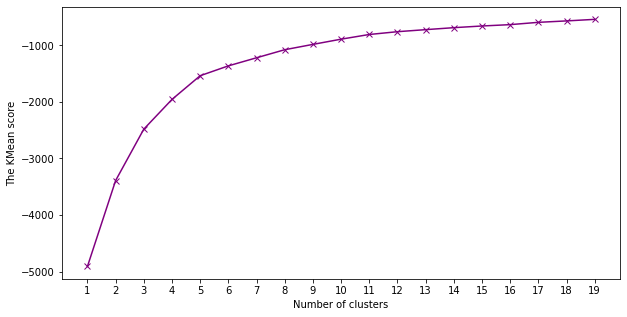

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(n_clusters, score, "x-", c="purple")
plt.xticks(n_clusters)
plt.xlabel("Number of clusters")
plt.ylabel("The KMean score");

For the following exercices, we are going to select 5 clusters as it is the breaking point of the score curve
---

In [19]:
n_clusters = 5
kmean = kmeans[n_clusters-1]

Let's add the corresponding cluster for each data point
---

In [20]:
X["cluster"] = kmean.labels_
X.head(20)

,Year Built,Length,Width,EUR_price,Number of views last 7 days,cluster
0,0.953230,-1.313650,-1.675717,-0.331870,-0.563431,0
1,0.879454,-1.403686,-1.711977,-0.331992,-0.707327,0
2,-0.227189,-1.173594,-1.222471,-0.331857,-0.614218,0
3,0.953230,-1.233618,-1.539743,-0.330440,-0.241781,0
4,0.879454,-1.403686,-1.711977,-0.331186,-0.614218,0
5,0.805678,-1.403686,-1.711977,-0.331198,-0.097885,0
6,0.953230,-1.311649,-1.675717,-0.331271,3.135545,1
7,-0.817398,-1.145583,-1.603198,-0.331305,0.511558,0
8,0.805678,-1.073554,-1.041173,-0.329168,0.376126,0
9,-3.399563,-1.013530,-1.168082,-0.329168,-0.571895,2


**We can see that a lot of data points are mapped to the first 3 clusters**

In [21]:
X.cluster.value_counts()

0    421
4    306
2    208
1     28
3     19
Name: cluster, dtype: int64

And visualize it for several data points (2 by 2 to easily visualize it)
---

In [22]:
def plot_clusters(df, x_name, y_name, kmean=None):
    plt.figure(figsize=(10, 10))
    plt.title(f"The clusters corresponding to {x_name} and {y_name}")
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    if kmean is not None:
        x_idx, y_idx = df.columns.get_loc(x_name), df.columns.get_loc(y_name)
    for cluster_idx in list(set(df.cluster)):
        mask = df.cluster == cluster_idx
        scatter = plt.scatter(df[x_name][mask].values, df[y_name][mask].values, marker="o", label=f"Cluster {cluster_idx}")
        if kmean is not None:
            center = kmean.cluster_centers_[cluster_idx]
            color = scatter.get_facecolors()[None, 0]
            plt.scatter(center[None, x_idx], center[None, y_idx], c=color, marker='x', s=200)
    if kmean is not None:
        plt.scatter([], [], c="black", marker="x", label="Cluster centers")
    plt.legend()

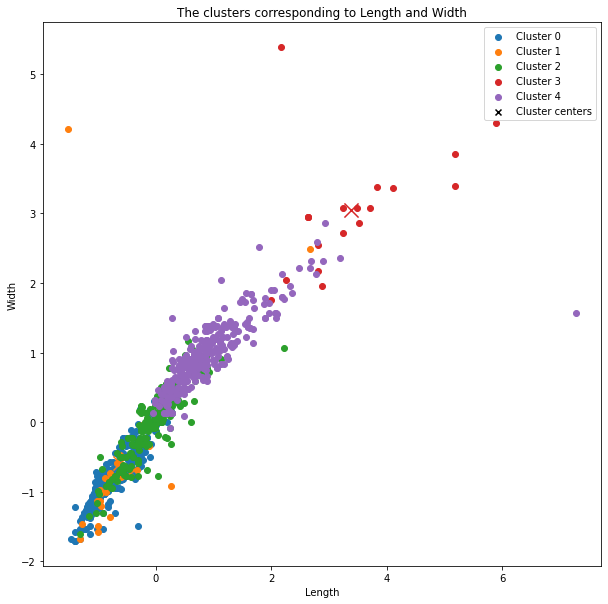

In [23]:
plot_clusters(X, "Length", "Width", kmean)

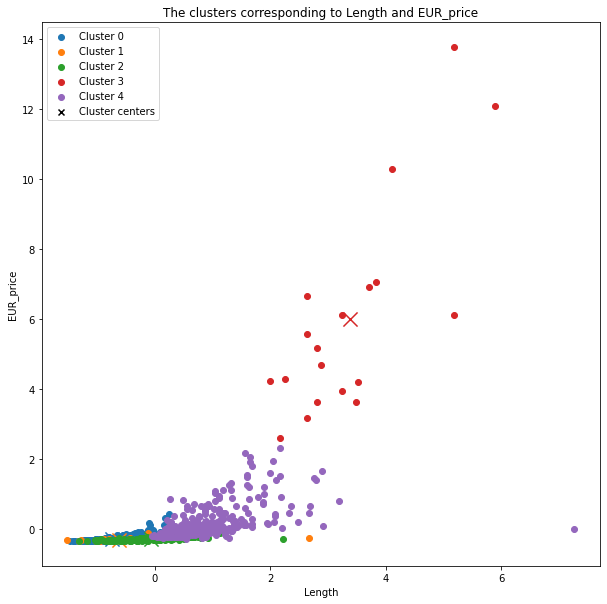

In [24]:
plot_clusters(X, "Length", "EUR_price", kmean)

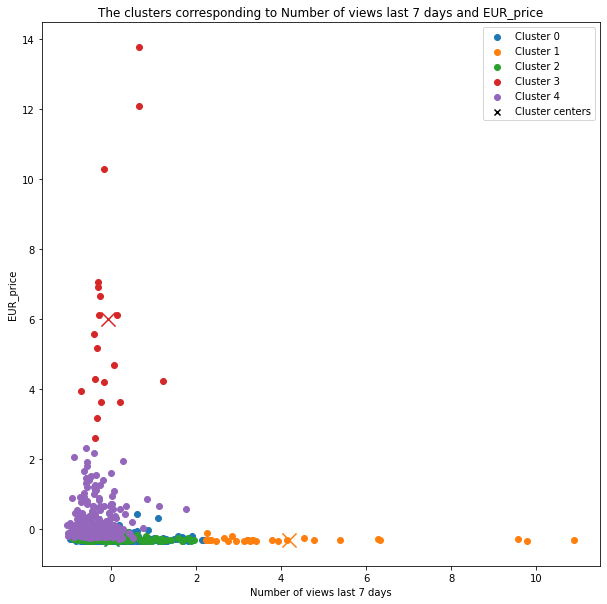

In [25]:
plot_clusters(X, "Number of views last 7 days", "EUR_price", kmean)

We can definetely tell that it exists different clusters tht we can visually spot and that have been found by the KMean algorithm. It would be interesting to see how related it is to the actual "Boat Type" or "Type" clusters.
---

In [26]:
pd.set_option('display.precision', 2)
X.groupby("cluster").aggregate({col: ['mean', 'median'] for col in X.columns if col != "cluster"}).T

cluster                                0     1     2     3         4
Year Built                  mean    0.72 -0.44 -1.40  0.60 -3.65e-02
                            median  0.88 -0.41 -1.22  0.66 -5.86e-03
Length                      mean   -0.73 -0.62 -0.06  3.38  8.99e-01
                            median -0.80 -0.79 -0.01  3.24  7.82e-01
Width                       mean   -0.79 -0.59 -0.03  3.04  9.76e-01
                            median -0.78 -0.80  0.05  2.95  9.08e-01
EUR_price                   mean   -0.26 -0.29 -0.26  6.01  1.93e-01
                            median -0.29 -0.30 -0.27  5.18  2.54e-02
Number of views last 7 days mean    0.03  4.19 -0.01 -0.07 -4.06e-01
                            median -0.11  3.30 -0.17 -0.27 -4.45e-01

Interpretion
---
**We can see really concentrated clusters for the different columns with their own mean and median, especially for the 3 first clusters that concentrated most of the data points**